38
Epoch 1/100
76/76 [==============================] - 13s 30ms/step - loss: 236.4957 - rmse: 11.9388 - r2_score: -13.1519 - val_loss: 158.1934 - val_rmse: 8.3443 - val_r2_score: -0.6518
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 69.9941 - rmse: 5.7615 - r2_score: -0.3561 - val_loss: 132.8996 - val_rmse: 7.4616 - val_r2_score: -0.3754
Epoch 3/100
76/76 [==============================] - 0s 3ms/step - loss: 59.0886 - rmse: 5.1345 - r2_score: -0.3132 - val_loss: 120.1042 - val_rmse: 6.9356 - val_r2_score: -0.2186
Epoch 4/100
76/76 [==============================] - 0s 3ms/step - loss: 51.7334 - rmse: 4.6624 - r2_score: -0.0299 - val_loss: 102.6574 - val_rmse: 6.4347 - val_r2_score: -0.0952
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 45.7594 - rmse: 4.3182 - r2_score: 0.2199 - val_loss: 92.6039 - val_rmse: 6.0672 - val_r2_score: -0.0025
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 41.6666 - rmse: 4.097

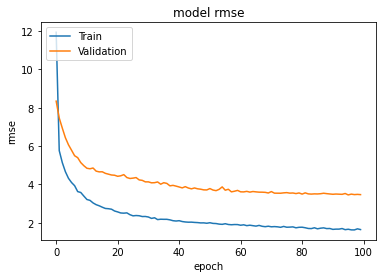

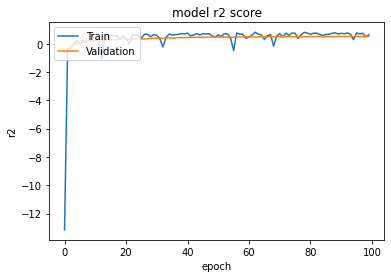

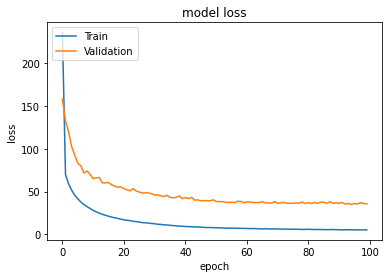

190
Epoch 1/100
76/76 [==============================] - 1s 5ms/step - loss: 261.4647 - rmse: 13.0452 - r2_score: -18.7711 - val_loss: 129.6935 - val_rmse: 7.7176 - val_r2_score: -0.4097
Epoch 2/100
76/76 [==============================] - 0s 3ms/step - loss: 74.3504 - rmse: 6.2410 - r2_score: -0.7951 - val_loss: 138.1862 - val_rmse: 7.6259 - val_r2_score: -0.4285
Epoch 3/100
76/76 [==============================] - 0s 3ms/step - loss: 68.9580 - rmse: 5.9254 - r2_score: -0.4084 - val_loss: 133.0471 - val_rmse: 7.3999 - val_r2_score: -0.3641
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 64.6696 - rmse: 5.5873 - r2_score: -0.3983 - val_loss: 125.4798 - val_rmse: 7.1495 - val_r2_score: -0.2807
Epoch 5/100
76/76 [==============================] - 0s 3ms/step - loss: 60.4453 - rmse: 5.3264 - r2_score: -0.6638 - val_loss: 104.8198 - val_rmse: 6.7942 - val_r2_score: -0.1620
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 55.5176 - rmse: 5.12

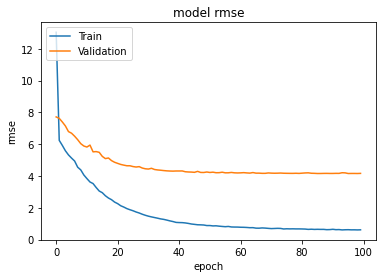

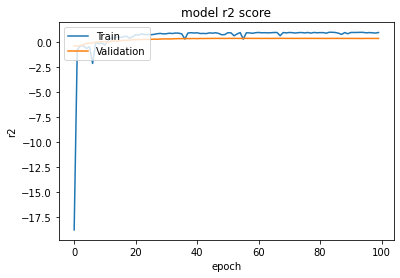

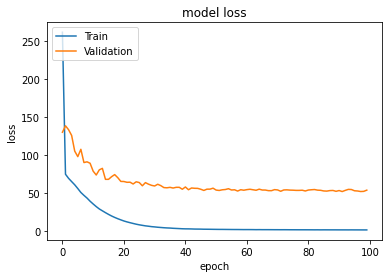

342
Epoch 1/100
76/76 [==============================] - 1s 6ms/step - loss: 269.5664 - rmse: 13.2390 - r2_score: -7.5358 - val_loss: 140.6223 - val_rmse: 7.8727 - val_r2_score: -0.5048
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 75.7777 - rmse: 6.2518 - r2_score: -0.5409 - val_loss: 132.6971 - val_rmse: 7.6490 - val_r2_score: -0.4211
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 71.5657 - rmse: 6.0702 - r2_score: -0.6202 - val_loss: 118.0992 - val_rmse: 7.4233 - val_r2_score: -0.3335
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 66.7408 - rmse: 5.8310 - r2_score: -0.3909 - val_loss: 108.4496 - val_rmse: 7.3549 - val_r2_score: -0.3362
Epoch 5/100
76/76 [==============================] - 0s 4ms/step - loss: 63.0745 - rmse: 5.6786 - r2_score: -0.4607 - val_loss: 115.9323 - val_rmse: 7.0975 - val_r2_score: -0.2652
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 57.9939 - rmse: 5.321

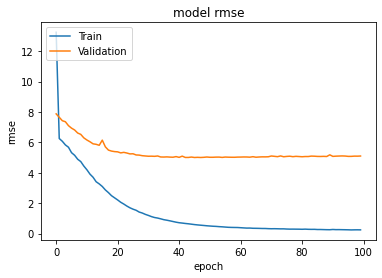

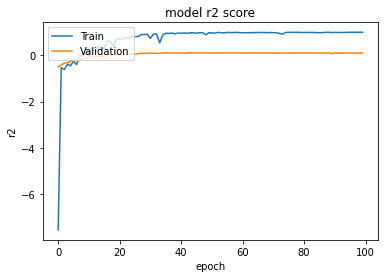

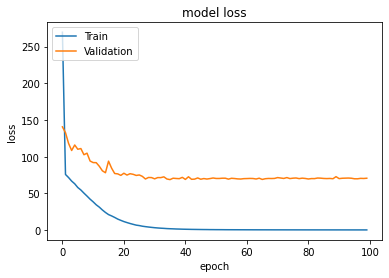

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.initializers import Initializer
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import math
from keras.datasets import boston_housing
from keras import layers
from keras import backend as K


class RBFLayer(layers.Layer):

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        d_max = 0
        for i in range(0, self.output_dim):
            for j in range(0, self.output_dim):
                d = np.linalg.norm(self.centers[i] - self.centers[j])
                if d > d_max:
                    d_max = d
        sigma = d_max / np.sqrt(2 * self.output_dim)
        self.betas = np.ones(self.output_dim) / (2 * (sigma ** 2))
        
        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)



def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
 
def r2_score(y_true, y_pred):
    g = K.sum(K.square(y_true - y_pred))
    y = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - g/(y + K.epsilon())

class Init_Centers_KMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        print(n_centers)
        return km.cluster_centers_



(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.25)

#z-score normalization
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)


rbf_neurons = [38, 190, 342]

for n in rbf_neurons:


  model = Sequential()
  rbflayer = RBFLayer(n, initializer=Init_Centers_KMeans(x_train), input_shape=(13,))
  model.add(rbflayer)
  model.add(keras.layers.Dense(128))
  model.add(keras.layers.Dense(1))


  model.compile(loss='mean_squared_error', optimizer = keras.optimizers.SGD(0.001), metrics=[rmse, r2_score])

  history = model.fit(x_train, y_train,batch_size=4, epochs=100, validation_split=0.2)

  scr = model.evaluate(x_test, y_test)



  # summarize history for root mean squared error
  plt.plot(history.history['rmse'])
  plt.plot(history.history['val_rmse'])
  plt.title('model rmse')
  plt.ylabel('rmse')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # summarize history for root mean squared error
  plt.plot(history.history['r2_score'])
  plt.plot(history.history['val_r2_score'])
  plt.title('model r2 score')
  plt.ylabel('r2')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()
